### K-means clustering

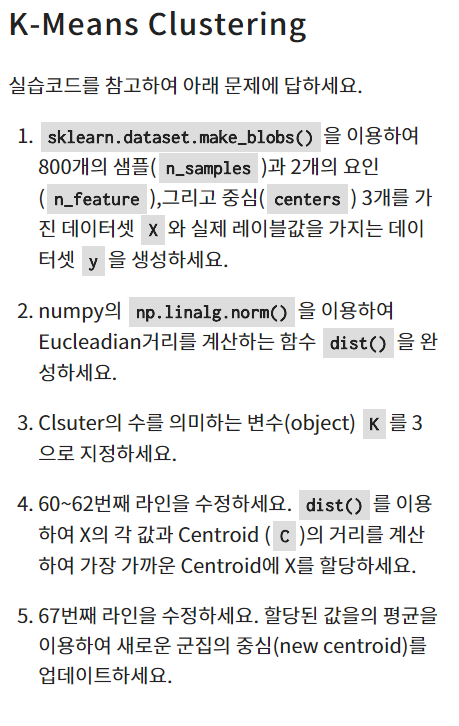

In [2]:
#setting
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from copy import deepcopy
import sklearn 

# Check versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

numpy version:  1.14.2
pandas version:  0.20.3


In [ ]:
#elice utils
from elice_utils import EliceUtils
elice_utils = EliceUtils()

In [3]:
#Create a dataset (X and y)
X, y = make_blobs(n_samples= 800, n_features= 3, centers=3, random_state = 12345) #n_features : 변수의 개수, centers : 생성할 클러스터의 수

In [4]:
#Q2: define a function to calculate Euclidean distance
def dist(a, b,axis = 1):
    """
    :param a: 1-D input array
    :param b: 1-D input array
    :param axis: an integer for the axis of a and b along which to compute the vector norms
    :return: Eucleadian distance (float) 
    """
    return np.linalg.norm(a - b, axis = axis)

In [5]:
#Number of K-clusters
K=3

In [6]:
#Setting random centroids
#numpy.random.randint, return random integers from low (inclusive) to high (exclusive)
#X coordinates of random centroids
C_x = np.random.randint(0, high=np.max(X), size=K)
#Y coordinates of ranodm centroids
C_y = np.random.randint(0, high=np.max(X), size=K)

C_z = np.random.randint(0, high=np.max(X), size=K)

C = np.array(list(zip(C_x,C_y,C_z)), dtype=np.float32)

initial Centroids [[ 4.  3.  8.]
 [ 9.  2.  0.]
 [ 1. 10.  9.]]


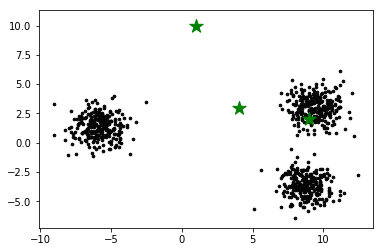

In [7]:
print("initial Centroids", C)
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1] , c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [10]:
#To store the value of centorids when it update
C_old = np.zeros(C.shape)

#Cluster Labels(0,1,2)
clusters = np.zeros(len(X))

#error func Distance between old centroid and new centroid
error = dist(C, C_old, None)

In [11]:
clusters

array([2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2,
       1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1,

In [12]:
print(error)

18.867962264113206


In [13]:
#loop run till the error not zeros
while error !=0:
    # assign each values to its closest cluster
    for i in range(len(X)):
        distance = dist(X[i],C)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    #store old centroid values
    
    C_old = deepcopy(C)
    
    #Finding the new centroids by taking the average values
    for i in range(K):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        del points[:]
    error = dist(C, C_old, None)
    
    print('error : ', error)


error :  15.759891
error :  3.179924
error :  0.09179043
error :  0.114351094
error :  0.071003325
error :  0.13265075
error :  0.10676204
error :  0.07710983
error :  0.090504624
error :  0.11463169
error :  0.104529925
error :  0.08841588
error :  0.06692826
error :  0.039724737
error :  0.030873453
error :  0.013737724
error :  0.013396745
error :  0.0


In [19]:
    for i in range(K):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        print(C[i])

[ 0.3000263  9.297419  -3.0153766]
[3.042946  4.05067   3.3753896]
[-3.0230186  7.9542727  3.5098221]


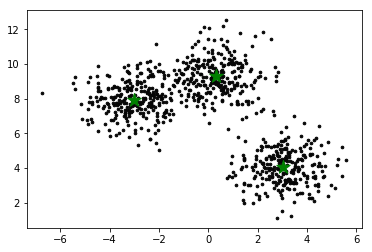

In [10]:
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(C[:,0], C[:,1],marker='*', s=200, c='g')
plt.show()